In [15]:
# This notebook contains testing for predicting straight line parameters
# Works like a charm... :)

In [8]:
import os
import numpy as np
import pandas as pd
from trackml.dataset import load_event
from trackml.randomize import shuffle_hits
from trackml.score import score_event
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import matplotlib.pyplot as plt
from hough import *
from conformal_map import *
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import layers
import tensorflow as tf

%matplotlib inline

In [12]:
import random

train_X = []
train_Y = []
dims = 50
N = 100
for i in range(N):
    train_Y.append([])
    image = np.zeros((dims, dims))
    nr_lines = random.randint(1, 20)
    for j in range(nr_lines):
        k = random.uniform(0, 1)
        m = random.uniform(0, 1)
        train_Y[-1].append([k, m])
        for x in range(dims):
            y = k * x + m
            image[x, int(y)] = 1
    for j in range(len(train_Y[-1]), 20):
        train_Y[-1].append([None, None])
    train_X.append(image)
    
train_X = np.reshape(train_X, (N, dims, dims, 1))
train_Y = np.reshape(train_Y, (N, 20, 2))

In [95]:
def build_model():
    model = Sequential() 
    model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(dims, dims, 1)))
    model.add(layers.Conv2D(32, (3, 3), activation="relu"))
    model.add(layers.Flatten())
    model.add(layers.Dense(20))
    model.add(layers.Lambda(lambda x: tf.expand_dims(model.output, axis=-1)))
    model.add(layers.LSTM(20))
    #optimizer = keras.optimizers.RMSprop(learning_rate=0.00001) #0.00001 works good
    model.compile(loss='mse', optimizer='adam')
    return model

In [96]:
model = build_model()

In [97]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_57 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 46, 46, 32)        9248      
_________________________________________________________________
flatten_22 (Flatten)         (None, 67712)             0         
_________________________________________________________________
dense_29 (Dense)             (None, 20)                1354260   
_________________________________________________________________
lambda_12 (Lambda)           (None, 20, 1)             0         
_________________________________________________________________
lstm_28 (LSTM)               (None, 20)                1760      
Total params: 1,365,588
Trainable params: 1,365,588
Non-trainable params: 0
_________________________________________________________________


In [98]:
#example_batch = train_X[:1]
#example_result = model.predict(example_batch)
#example_result

In [99]:
EPOCHS = 5
print(train_X.shape)
print(train_Y.shape)
history = model.fit(train_X, train_Y, validation_split=0.1, epochs=EPOCHS)

(100, 50, 50, 1)
(100, 20, 2)


ValueError: Error when checking target: expected lstm_28 to have 2 dimensions, but got array with shape (100, 20, 2)

In [73]:
print(train_X.shape)
prediction = model.predict(train_X)
#print(prediction - train_Y)
print(prediction)
print(train_Y)

(100, 50, 50, 1)
[[[nan nan]
  [nan nan]
  [nan nan]
  ...
  [nan nan]
  [nan nan]
  [nan nan]]

 [[nan nan]
  [nan nan]
  [nan nan]
  ...
  [nan nan]
  [nan nan]
  [nan nan]]

 [[nan nan]
  [nan nan]
  [nan nan]
  ...
  [nan nan]
  [nan nan]
  [nan nan]]

 ...

 [[nan nan]
  [nan nan]
  [nan nan]
  ...
  [nan nan]
  [nan nan]
  [nan nan]]

 [[nan nan]
  [nan nan]
  [nan nan]
  ...
  [nan nan]
  [nan nan]
  [nan nan]]

 [[nan nan]
  [nan nan]
  [nan nan]
  ...
  [nan nan]
  [nan nan]
  [nan nan]]]
[[[0.3061403895092857 0.6406105513320187]
  [0.8145927518071947 0.8621164887354286]
  [0.28981413584070914 0.9414974905417384]
  ...
  [None None]
  [None None]
  [None None]]

 [[0.9551329635092358 0.2102555992806019]
  [0.8206610938658528 0.020946086484476267]
  [0.16792042549871644 0.06079393647155307]
  ...
  [None None]
  [None None]
  [None None]]

 [[0.8322236471086458 0.9103182543888078]
  [0.44419415872966694 0.25386849507318787]
  [0.3334136044900199 0.8580983520702222]
  ...
  [Non

In [82]:
k = random.uniform(0, 1)
m = random.uniform(0, 1)
image = np.zeros((dims, dims))
for x in range(dims):
    y = k * x + m
    image[x, int(y)] = 1
    
predicted_params = model.predict(np.array([np.reshape(image, (dims, dims, 1))]))
print(predicted_params)

[[[nan nan]
  [nan nan]
  [nan nan]
  [nan nan]
  [nan nan]
  [nan nan]
  [nan nan]
  [nan nan]
  [nan nan]
  [nan nan]
  [nan nan]
  [nan nan]
  [nan nan]
  [nan nan]
  [nan nan]
  [nan nan]
  [nan nan]
  [nan nan]
  [nan nan]
  [nan nan]]]


## Real line

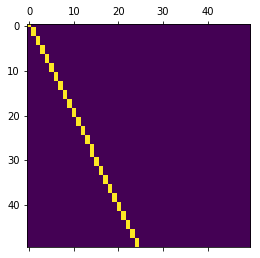

In [75]:
plt.matshow(image)
plt.show()

## Predicted line


In [76]:
predicted_image = np.zeros((dims, dims))
for x in range(dims):
    y = predicted_params[0][0] * x + predicted_params[0][1]
    predicted_image[x, int(y)] = 1
plt.matshow(predicted_image)
plt.show()

TypeError: only size-1 arrays can be converted to Python scalars

In [174]:
print("Equation predicted from neural network:", "y =", str(k) + "x", "+", m)

Equation predicted from neural network: y = 0.41867995022983684x + 0.673239055540219
